In [18]:
import matplotlib.pyplot as plt

# Ising model optimization

### The model

Description

## GRAPE optimization

In [8]:
import os, sys
from IsingModel.AlastairProblem_GRAPE import AlastairFoMGRAPE


In [9]:
# Create the results path
results_path = "./results/"
if not os.path.exists(results_path):
    os.makedirs(results_path)

### Define the FoM class

In [10]:
args_dict = {"n_qubits": 5,
         "J": 1,
         "g": 2,
         "N_slices": 100,
         "T": 1.0}
fom = AlastairFoMGRAPE(args_dict)

Testing shaping option list mode
100


### Run the Optimization

In [11]:
t1 = time.time()

print("The optimizer started successfully")
fom.optimize()
print("The optimizer ran successfully")
thomas_stuff = fom.get_stuff_for_thomas()
print("The optimizer finished successfully")

t2 = time.time()
print("Optimization time: {optimization_time}"
      .format(optimization_time=t2 - t1))

The optimizer started successfully
The optimizer ran successfully
The optimizer finished successfully
Optimization time: 7.3022871017456055


### Save the results

In [14]:
optimization_time = t2 -t1
with open(os.path.join(results_path, 'optimization_time.txt'), 'w') as f:
    f.write('# Time for optimization in seconds:\n')
    f.write(str(optimization_time))

fomlist = [element * (-1) for element in fom.GRAPE.fom_list]
np.savetxt(os.path.join(results_path, 'fom.txt'), fomlist)

np.savetxt(os.path.join(results_path, 'opt_pulses.txt'), fom.GRAPE.optimized_pulses)

### Plot the results

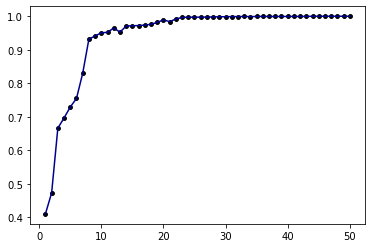

In [20]:
iterations = range(1, len(fomlist)+1)
plt.plot(iterations, 1 + np.asarray(fomlist), color='darkblue', linewidth=1.5, zorder=10)
plt.scatter(iterations, 1 + np.asarray(fomlist), color='k', s=15)

## dCRAB Optimization

In [ ]:
from quocslib.optimalcontrolproblems.OneQubitProblem import OneQubit
from quocslib.handleexit.HandleExit import HandleExit
from quocslib.utils.dynamicimport import dynamic_import
from quocslib.utils.inputoutput import readjson
from quocslib.communication.AllInOneCommunication import AllInOneCommunication
from quocslib.utils.BestDump import BestDump

In [4]:
from quocslib.pulses.basis.ChoppedBasis import ChoppedBasis

class Fourier2(ChoppedBasis):
    def __init__():
        pass
    def get_shape():
        pass
    

In [16]:
from quocslib.pulses.superparameter.Uniform import Uniform 
from quocslib.pulses.basis.Fourier import Fourier
opti_comm_dict = {
    "optimization_dictionary": {
        "algorithm_settings": {
            "super_iteration_number": 6,
            "maximum_function_evaluations_number": 99
        },
        "dsm_settings": {
            "general_settings": {
                "dsm_name": "nelder_mead",
                "is_adaptive": True
            },
            "stopping_criteria": {
                "iterations_number": 100,
                "xatol": 1e-14,
                "frtol": 1e-14
            }
        },
        "pulses": [
            {
                "pulse_name": "Pulse1",
                "upper_limit": 15.0,
                "lower_limit": -15.0,
                "bins_number": 101,
                "time_name": "time1",
                "amplitude_variation": 0.5,
                "basis": {
                    "basis_name": "Fourier",
                    "basis_attribute": Fourier,
                    "basis_vector_number": 10,
                    "random_super_parameter_distribution": {
                        "distribution_name": "Uniform",
                        "distribution_attribute": Uniform,
                        "lower_limit": 0.1,
                        "upper_limit": 30.0
                    }
                },
                "scaling_function": {
                    "function_type": "lambda_function",
                    "lambda_function": "lambda t: 1.0 + 0.0*t"
                },
                "initial_guess": {
                    "function_type": "lambda_function",
                    "lambda_function": "lambda t: np.pi/3 + 0.0*t"
                }
            }
        ],
        "times": [
            {
                "time_name": "time1",
                "initial_value": 3.0
            }
        ],
        "parameters": []
    }
}

In [15]:
optimization_dictionary = opti_comm_dict["optimization_dictionary"]

## Communication object

In [11]:
# Create the fom obj by importing the class you want to use. You can create your own elevuating class here or import it from a module
from quocslib.optimalcontrolproblems.OneQubitProblem import OneQubit
fom_obj = OneQubit()
communication_obj = AllInOneCommunication(
    interface_job_name="JustATest",
    fom_obj=fom_obj,
    dump_attribute=BestDump,
    handle_exit_obj=HandleExit()
)

## Optimizer object

In [17]:
from quocslib.optimalalgorithms.dCRABAlgorithm import DCrabAlgorithm
# Create the optimizer
optimizer_obj = DCrabAlgorithm(optimization_dict=optimization_dictionary,
                                    communication_obj=communication_obj)

dsm_name is used direct search methods. This option is deprecated. Use 
dsm_algorithm_module: quocslib.freegradients.NelderMead
dsm_algorithm_class: NelderMead
{'iterations_number': 100, 'xatol': 1e-14, 'frtol': 1e-14}
Testing shaping option list mode


In [18]:
# Run
optimizer_obj.run()
print("The optimization ended")

INFO     oc_logger    Found a record. Previous fom: 10000000000.0, new best fom : 0.4999999999999979
INFO     oc_logger    Function evaluation number: 1, FoM: 0.4999999999999979
INFO     oc_logger    Function evaluation number: 2, FoM: 0.5774813433138344
INFO     oc_logger    Found a record. Previous fom: 0.4999999999999979, new best fom : 0.3407290021459395
INFO     oc_logger    Function evaluation number: 3, FoM: 0.3407290021459395
INFO     oc_logger    Function evaluation number: 4, FoM: 0.545910415080727
INFO     oc_logger    Function evaluation number: 5, FoM: 0.5495013580067385
INFO     oc_logger    Function evaluation number: 6, FoM: 0.4952033442304645
INFO     oc_logger    Function evaluation number: 7, FoM: 0.5401131934700929
INFO     oc_logger    Function evaluation number: 8, FoM: 0.5394718259511864
INFO     oc_logger    Function evaluation number: 9, FoM: 0.44082927335918165
INFO     oc_logger    Function evaluation number: 10, FoM: 0.5279933366922605
INFO     oc_logger    

INFO     oc_logger    Function evaluation number: 65, FoM: 0.16058011783298776
INFO     oc_logger    Function evaluation number: 66, FoM: 0.1611032357431449
INFO     oc_logger    Found a record. Previous fom: 0.16058011783298776, new best fom : 0.15893098896434932
INFO     oc_logger    Function evaluation number: 67, FoM: 0.15893098896434932
INFO     oc_logger    Found a record. Previous fom: 0.15893098896434932, new best fom : 0.15180145912018572
INFO     oc_logger    Function evaluation number: 68, FoM: 0.15180145912018572
INFO     oc_logger    Found a record. Previous fom: 0.15180145912018572, new best fom : 0.145344075625777
INFO     oc_logger    Function evaluation number: 69, FoM: 0.145344075625777
INFO     oc_logger    Found a record. Previous fom: 0.145344075625777, new best fom : 0.1378781824483145
INFO     oc_logger    Function evaluation number: 70, FoM: 0.1378781824483145
INFO     oc_logger    Function evaluation number: 71, FoM: 0.1394189588171909
INFO     oc_logger    Fou

INFO     oc_logger    Function evaluation number: 127, FoM: 0.01350673054235385
INFO     oc_logger    Function evaluation number: 128, FoM: 0.012894156004088164
INFO     oc_logger    Function evaluation number: 129, FoM: 0.012065384715997052
INFO     oc_logger    Function evaluation number: 130, FoM: 0.011151752560405015
INFO     oc_logger    Function evaluation number: 131, FoM: 0.010274996472346642
INFO     oc_logger    Function evaluation number: 132, FoM: 0.00961808685278609
INFO     oc_logger    Function evaluation number: 133, FoM: 0.009004512118773178
INFO     oc_logger    Function evaluation number: 134, FoM: 0.008546127161735195
INFO     oc_logger    Function evaluation number: 135, FoM: 0.0076418908711223255
INFO     oc_logger    Function evaluation number: 136, FoM: 0.007349207644211098
INFO     oc_logger    Function evaluation number: 137, FoM: 0.006458797683634221
INFO     oc_logger    Function evaluation number: 138, FoM: 0.005622938522385823
INFO     oc_logger    Functio

INFO     oc_logger    Function evaluation number: 201, FoM: 3.4214964472756293e-07
INFO     oc_logger    Function evaluation number: 202, FoM: 0.00520484012126321
INFO     oc_logger    Function evaluation number: 203, FoM: 0.017450195316433215
INFO     oc_logger    Function evaluation number: 204, FoM: 0.00029159068802286914
INFO     oc_logger    Function evaluation number: 205, FoM: 0.0039133271776283785
INFO     oc_logger    Function evaluation number: 206, FoM: 0.0015337243703065218
INFO     oc_logger    Function evaluation number: 207, FoM: 0.0018828272715251115
INFO     oc_logger    Function evaluation number: 208, FoM: 0.0039944193653285165
INFO     oc_logger    Function evaluation number: 209, FoM: 2.6877589928142598e-06
INFO     oc_logger    Function evaluation number: 210, FoM: 0.002567436327870931
INFO     oc_logger    Function evaluation number: 211, FoM: 0.00032000715385294143
INFO     oc_logger    Function evaluation number: 212, FoM: 0.001108804183636125
INFO     oc_logge

INFO     oc_logger    Function evaluation number: 300, FoM: 0.00024084465528284582
INFO     oc_logger    SI: 3, Total nr fnct evaluations: 100, 
Termination Reason: Exceed number of evaluations
Current best fom: 1.7181485256756446e-07
INFO     oc_logger    Function evaluation number: 301, FoM: 1.7181485256756446e-07
INFO     oc_logger    Function evaluation number: 302, FoM: 4.637064236612254e-05
INFO     oc_logger    Function evaluation number: 303, FoM: 0.0001522520789576376
INFO     oc_logger    Function evaluation number: 304, FoM: 0.003064443693750807
INFO     oc_logger    Function evaluation number: 305, FoM: 0.00013486937779128017
INFO     oc_logger    Function evaluation number: 306, FoM: 0.00015405657808365003
INFO     oc_logger    Function evaluation number: 307, FoM: 0.00012930341708372595
INFO     oc_logger    Function evaluation number: 308, FoM: 2.6460711722409158e-05
INFO     oc_logger    Function evaluation number: 309, FoM: 7.299409259253764e-07
INFO     oc_logger    F

INFO     oc_logger    Function evaluation number: 398, FoM: 6.53575694425923e-05
INFO     oc_logger    Function evaluation number: 399, FoM: 2.2673684768825808e-05
INFO     oc_logger    SI: 4, Total nr fnct evaluations: 99, 
Termination Reason: Exceed number of evaluations
Current best fom: 1.7181485256756446e-07
INFO     oc_logger    Function evaluation number: 400, FoM: 1.7181485256756446e-07
INFO     oc_logger    Function evaluation number: 401, FoM: 1.7384403294684603e-07
INFO     oc_logger    Function evaluation number: 402, FoM: 0.0003157631489328905
INFO     oc_logger    Found a record. Previous fom: 1.7181485256756446e-07, new best fom : 3.21938150582568e-08
INFO     oc_logger    Function evaluation number: 403, FoM: 3.21938150582568e-08
INFO     oc_logger    Function evaluation number: 404, FoM: 3.856030303839297e-06
INFO     oc_logger    Function evaluation number: 405, FoM: 0.0003918178867318156
INFO     oc_logger    Function evaluation number: 406, FoM: 3.581187512424755e-0

INFO     oc_logger    Function evaluation number: 495, FoM: 2.2217174956429275e-06
INFO     oc_logger    Function evaluation number: 496, FoM: 4.678085857356962e-06
INFO     oc_logger    Function evaluation number: 497, FoM: 2.014068951283754e-06
INFO     oc_logger    Function evaluation number: 498, FoM: 4.533949340856935e-06
INFO     oc_logger    Function evaluation number: 499, FoM: 1.962500418617452e-06
INFO     oc_logger    SI: 5, Total nr fnct evaluations: 100, 
Termination Reason: Exceed number of evaluations
Current best fom: 3.21938150582568e-08
INFO     oc_logger    Function evaluation number: 500, FoM: 3.21938150582568e-08
INFO     oc_logger    Function evaluation number: 501, FoM: 6.894574056115488e-08
INFO     oc_logger    Function evaluation number: 502, FoM: 5.344679607532932e-05
INFO     oc_logger    Function evaluation number: 503, FoM: 0.0019135811691743942
INFO     oc_logger    Function evaluation number: 504, FoM: 0.00022399843435305655
INFO     oc_logger    Functio

INFO     oc_logger    Function evaluation number: 593, FoM: 8.428671594895576e-06
INFO     oc_logger    Function evaluation number: 594, FoM: 1.712313931556686e-05
INFO     oc_logger    Function evaluation number: 595, FoM: 8.411786448836445e-06
INFO     oc_logger    Function evaluation number: 596, FoM: 2.081081424609721e-05
INFO     oc_logger    Function evaluation number: 597, FoM: 7.912725230374562e-06
INFO     oc_logger    Function evaluation number: 598, FoM: 1.5441207934174805e-05
INFO     oc_logger    Function evaluation number: 599, FoM: 7.671304135925539e-06
INFO     oc_logger    SI: 6, Total nr fnct evaluations: 100, 
Termination Reason: Exceed number of evaluations
Current best fom: 3.21938150582568e-08
The optimization ended


In [19]:
# End
optimizer_obj.end()

INFO     oc_logger    Figure of merit : 3.21938150582568e-08
INFO     oc_logger    total number of function evaluations : 599
INFO     oc_logger    dcrab_freq_list : [array([[ 0.62581443,  4.90777208,  7.24442825,  9.69220408, 14.7528798 ,
        16.92256071, 18.44770308, 22.94847344, 24.47563643, 27.46277362]]), array([[ 0.83925713,  5.05548159,  6.90831816, 11.35164753, 12.69738576,
        16.30616373, 20.62494706, 22.51076556, 26.66251751, 27.9924358 ]]), array([[ 0.6753653 ,  3.69362456,  6.95821076,  9.28774009, 12.83615153,
        15.92490288, 19.85452353, 21.8341651 , 25.34196648, 29.48734056]]), array([[ 2.67985245,  3.56528374,  7.45015795,  9.20773164, 12.34474826,
        15.74273897, 20.78608211, 23.45277937, 26.42125448, 29.77804763]]), array([[ 2.89784242,  5.9786509 ,  8.47417037, 10.46524374, 13.91590884,
        16.17285118, 20.91406811, 23.17826851, 24.16778646, 28.4290981 ]]), array([[ 0.98593539,  3.39967225,  7.18712953,  9.76649985, 14.6559174 ,
        17.5354